<a href="https://colab.research.google.com/github/ehpub/KFQ_DL_2023-/blob/main/2023_kfq_%EB%94%A5%EB%9F%AC%EB%8B%9D_%EB%B0%91%EB%B0%94%EB%8B%A5%EB%B6%80%ED%84%B0_%ED%9B%88%EB%A0%A8_%EC%BB%A8%EB%B8%8C%EB%84%B7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

참고 교재: https://www.gilbut.co.kr/book/view?bookcode=BN003496

In [1]:
import gdown

In [2]:
gdown.download(id='18uC7WTuEXKJDDxbj-Jq6EjzpFrgE7IAd', output='dogs-vs-cats.zip')

Downloading...
From: https://drive.google.com/uc?id=18uC7WTuEXKJDDxbj-Jq6EjzpFrgE7IAd
To: /content/dogs-vs-cats.zip
100%|██████████| 852M/852M [00:03<00:00, 236MB/s]


'dogs-vs-cats.zip'

In [3]:
!unzip -qq dogs-vs-cats.zip

In [4]:
!unzip -qq train.zip

In [5]:
import os,shutil,pathlib

In [6]:
original_dir = pathlib.Path('train')
new_base_dir = pathlib.Path('cats_vs_dogs_small')

In [7]:
def make_subset(subset_name,start_index,end_index):
  for category in ("cat","dog"):
    dir = new_base_dir/subset_name/category
    os.makedirs(dir)
    fnames= [f'{category}.{i}.jpg' for i in range(start_index,end_index)]
    for fname in fnames:
      shutil.copyfile(src=original_dir/fname,
                      dst=dir/fname)

In [8]:
make_subset("train",start_index=0,end_index=1000)
make_subset("validataion",start_index=1000,end_index=1500)
make_subset("test",start_index=1500,end_index=2500)

In [9]:
import tensorflow as tf
from tensorflow import keras
from keras import layers

In [10]:
inputs = keras.Input(shape=(180,180,3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(32,kernel_size=3,activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(64,kernel_size=3,activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(128,kernel_size=3,activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(256,kernel_size=3,activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(256,kernel_size=3,activation='relu')(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1,activation='sigmoid')(x)
model = keras.Model(inputs,outputs)

In [11]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                         

In [12]:
model.compile(loss=keras.losses.binary_crossentropy,
              metrics=['accuracy'])

In [13]:
from keras.utils import image_dataset_from_directory

In [14]:
train_dataset = image_dataset_from_directory(
    new_base_dir/"train",
    image_size=(180,180),
    batch_size=32
)
validation_dataset = image_dataset_from_directory(
    new_base_dir/"validataion",
    image_size=(180,180),
    batch_size=32
)
test_dataset = image_dataset_from_directory(
    new_base_dir/"test",
    image_size=(180,180),
    batch_size=32
)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [15]:
for data_batch , labels_batch in train_dataset:
  print(data_batch.shape, labels_batch.shape)
  break

(32, 180, 180, 3) (32,)


In [16]:
import matplotlib.pyplot as plt

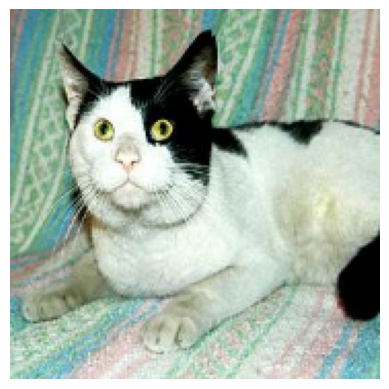

In [17]:
image = data_batch[0].numpy()
image = image.astype('int32')
plt.axis('off')
plt.imshow(image)
plt.show()

In [18]:
mcp = keras.callbacks.ModelCheckpoint(
    filepath='convnet_from_scratch.keras',
    save_best_only=True,
    monitor = 'val_loss'
)
hist = model.fit(train_dataset,
                 epochs=30,
                 validation_data=validation_dataset,
                 callbacks=[mcp])

Epoch 1/30
63/63 [==============================] - 20s 88ms/step - loss: 0.7030 - accuracy: 0.5090 - val_loss: 0.6923 - val_accuracy: 0.5010
Epoch 2/30
63/63 [==============================] - 4s 64ms/step - loss: 0.6938 - accuracy: 0.5175 - val_loss: 0.6920 - val_accuracy: 0.5140
Epoch 3/30
63/63 [==============================] - 5s 76ms/step - loss: 0.6927 - accuracy: 0.5400 - val_loss: 0.6880 - val_accuracy: 0.5030
Epoch 4/30
63/63 [==============================] - 4s 64ms/step - loss: 0.6718 - accuracy: 0.5800 - val_loss: 0.6600 - val_accuracy: 0.5850
Epoch 5/30
63/63 [==============================] - 4s 64ms/step - loss: 0.6490 - accuracy: 0.6335 - val_loss: 0.6404 - val_accuracy: 0.6040
Epoch 6/30
63/63 [==============================] - 5s 75ms/step - loss: 0.6128 - accuracy: 0.6645 - val_loss: 0.5863 - val_accuracy: 0.6780
Epoch 7/30
63/63 [==============================] - 4s 63ms/step - loss: 0.5735 - accuracy: 0.6940 - val_loss: 0.6686 - val_accuracy: 0.5800
Epoch 8/30
6

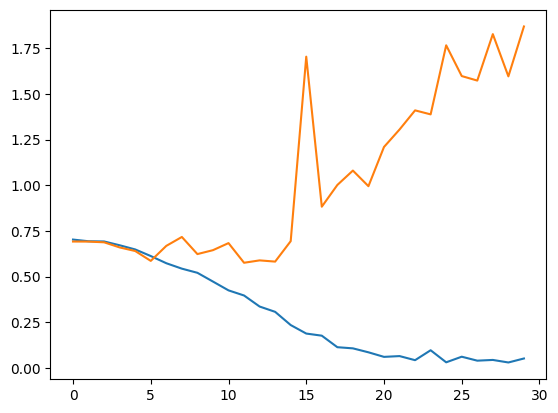

In [19]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.show()

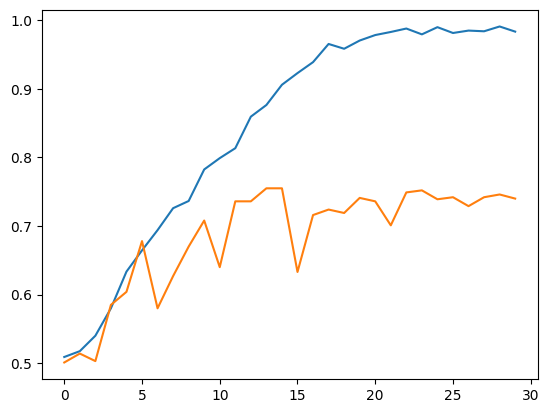

In [20]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.show()

In [21]:
tm = keras.models.load_model('convnet_from_scratch.keras')
tm.evaluate(test_dataset)


63/63 [==============================] - 3s 45ms/step - loss: 0.6205 - accuracy: 0.7235


[0.6205472350120544, 0.7235000133514404]

In [22]:
da_model = keras.Sequential()
da_model.add(layers.RandomFlip('horizontal'))
da_model.add(layers.RandomRotation(0.1))
da_model.add(layers.RandomZoom(0.2))

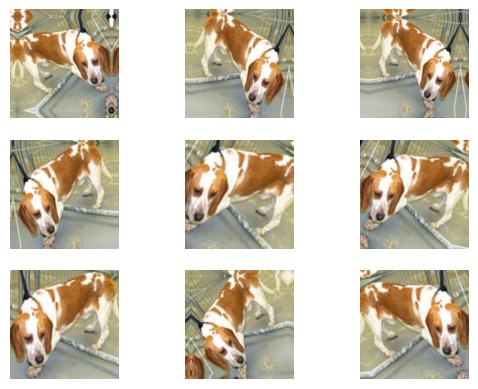

In [26]:
for images, _ in train_dataset.take(1):
  for i in range(9):
    da_images = da_model(images)
    ax = plt.subplot(3,3,i+1)
    plt.imshow(da_images[0].numpy().astype('uint8'))
    plt.axis('off')

In [27]:
inputs = keras.Input(shape=(180,180,3))
x = da_model(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(32,kernel_size=3,activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(64,kernel_size=3,activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(128,kernel_size=3,activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(256,kernel_size=3,activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(256,kernel_size=3,activation='relu')(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1,activation='sigmoid')(x)
model = keras.Model(inputs,outputs)

In [28]:
model.compile(loss=keras.losses.binary_crossentropy,
              metrics=['accuracy'])
mcp = keras.callbacks.ModelCheckpoint(
    filepath='convnet_from_scratch_a.keras',
    save_best_only=True,
    monitor = 'val_loss'
)
hist = model.fit(train_dataset,
                 epochs=100,
                 validation_data=validation_dataset,
                 callbacks=[mcp])

Epoch 1/100
63/63 [==============================] - 8s 66ms/step - loss: 0.6972 - accuracy: 0.5025 - val_loss: 0.6925 - val_accuracy: 0.5010
Epoch 2/100
63/63 [==============================] - 5s 74ms/step - loss: 0.6946 - accuracy: 0.5065 - val_loss: 0.7002 - val_accuracy: 0.5000
Epoch 3/100
63/63 [==============================] - 4s 65ms/step - loss: 0.6938 - accuracy: 0.5590 - val_loss: 0.6817 - val_accuracy: 0.5540
Epoch 4/100
63/63 [==============================] - 5s 82ms/step - loss: 0.6833 - accuracy: 0.5725 - val_loss: 0.6836 - val_accuracy: 0.5370
Epoch 5/100
63/63 [==============================] - 6s 86ms/step - loss: 0.6686 - accuracy: 0.6015 - val_loss: 0.6875 - val_accuracy: 0.5620
Epoch 6/100
63/63 [==============================] - 6s 82ms/step - loss: 0.6627 - accuracy: 0.6430 - val_loss: 0.6486 - val_accuracy: 0.6200
Epoch 7/100
63/63 [==============================] - 4s 64ms/step - loss: 0.6359 - accuracy: 0.6415 - val_loss: 0.6409 - val_accuracy: 0.6090
Epoch 

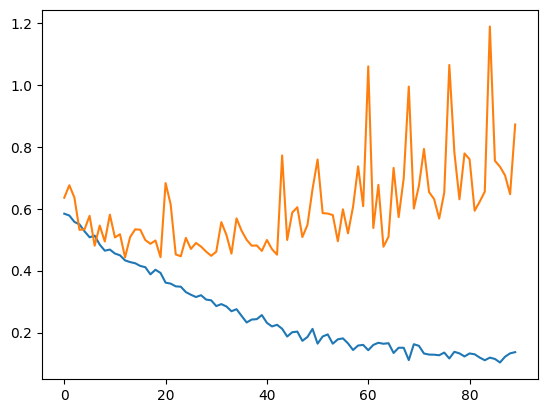

In [32]:
plt.plot(hist.history['loss'][10:])
plt.plot(hist.history['val_loss'][10:])
plt.show()

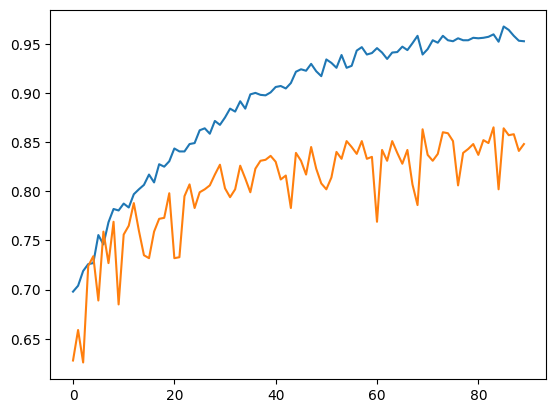

In [34]:
plt.plot(hist.history['accuracy'][10:])
plt.plot(hist.history['val_accuracy'][10:])
plt.show()

In [35]:
tm = keras.models.load_model('convnet_from_scratch_a.keras')
tm.evaluate(test_dataset)

63/63 [==============================] - 3s 39ms/step - loss: 0.4744 - accuracy: 0.7765


[0.474362313747406, 0.7764999866485596]

## 사전 훈련된 모델 사용

In [36]:
conv_base = keras.applications.vgg16.VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(180,180,3)
)

58889256/58889256 [==============================] - 4s 0us/step


In [37]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

In [39]:
import numpy as np
from keras.applications import vgg16

In [43]:
def get_features_and_labels(dataset):
  all_features=[]
  all_labels=[]
  for images, labels in dataset:
    pre_images = vgg16.preprocess_input(images)
    features = conv_base.predict(pre_images)
    all_features.append(features)
    all_labels.append(labels)
  return np.concatenate(all_features), np.concatenate(all_labels)

In [44]:
x_train,y_train = get_features_and_labels(train_dataset)
x_val, y_val = get_features_and_labels(validation_dataset)
x_test, y_test = get_features_and_labels(test_dataset)

1/1 [==============================] - 0s 22ms/step


In [45]:
x_train.shape

(2000, 5, 5, 512)

In [46]:
inputs = keras.Input(shape=(5,5,512))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1,activation='sigmoid')(x)
model = keras.Model(inputs,outputs)

In [47]:
model.compile(loss= keras.losses.binary_crossentropy,
              metrics=['accuracy'])
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 5, 5, 512)]       0         
                                                                 
 flatten_2 (Flatten)         (None, 12800)             0         
                                                                 
 dense_2 (Dense)             (None, 256)               3277056   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
Total params: 3,277,313
Trainable params: 3,277,313
Non-trainable params: 0
_________________________________________________________________


In [48]:
mcp = keras.callbacks.ModelCheckpoint(
    filepath='feature_extraction.keras',
    save_best_only=True,
    monitor = 'val_loss'
)
hist = model.fit(x_train,y_train,epochs=20,
                 validation_data = (x_val,y_val),
                 callbacks=[mcp])

Epoch 1/20
63/63 [==============================] - 2s 10ms/step - loss: 11.7752 - accuracy: 0.9335 - val_loss: 7.7924 - val_accuracy: 0.9510
Epoch 2/20
63/63 [==============================] - 1s 8ms/step - loss: 5.3034 - accuracy: 0.9705 - val_loss: 5.9971 - val_accuracy: 0.9660
Epoch 3/20
63/63 [==============================] - 1s 9ms/step - loss: 1.8456 - accuracy: 0.9840 - val_loss: 3.8515 - val_accuracy: 0.9760
Epoch 4/20
63/63 [==============================] - 1s 9ms/step - loss: 1.7000 - accuracy: 0.9910 - val_loss: 2.9371 - val_accuracy: 0.9800
Epoch 5/20
63/63 [==============================] - 1s 8ms/step - loss: 0.3603 - accuracy: 0.9975 - val_loss: 6.9883 - val_accuracy: 0.9700
Epoch 6/20
63/63 [==============================] - 1s 9ms/step - loss: 2.0669 - accuracy: 0.9870 - val_loss: 4.8174 - val_accuracy: 0.9770
Epoch 7/20
63/63 [==============================] - 1s 9ms/step - loss: 0.8827 - accuracy: 0.9945 - val_loss: 3.3622 - val_accuracy: 0.9810
Epoch 8/20
63/63 [

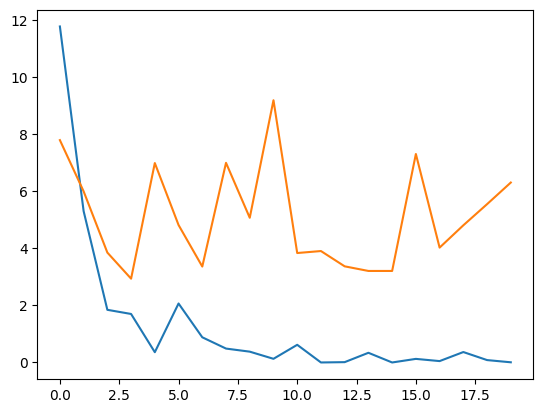

In [49]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.show()

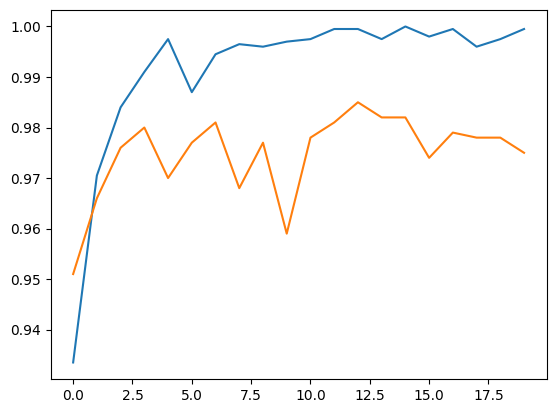

In [50]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.show()

In [51]:
model.evaluate(x_test,y_test)

63/63 [==============================] - 1s 9ms/step - loss: 8.0915 - accuracy: 0.9710


[8.0914888381958, 0.9710000157356262]

In [57]:
da_model = keras.Sequential()
da_model.add(layers.RandomFlip('horizontal'))
da_model.add(layers.RandomRotation(0.1))
da_model.add(layers.RandomZoom(0.2))

In [58]:
conv_base = vgg16.VGG16(
    weights='imagenet',
    include_top=False
)
conv_base.trainable = False #역전파에 의해 최적화 작업은 하지 마세요.

In [60]:
inputs = keras.Input(shape=(180,180,3))
x = da_model(inputs)
x = vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1,activation='sigmoid')(x)
model = keras.Model(inputs,outputs)

In [61]:
model.compile(loss = keras.losses.binary_crossentropy,
              metrics=['accuracy'])
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 sequential_2 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 tf.__operators__.getitem_1   (None, 180, 180, 3)      0         
 (SlicingOpLambda)                                               
                                                                 
 tf.nn.bias_add_1 (TFOpLambd  (None, 180, 180, 3)      0         
 a)                                                              
                                                                 
 vgg16 (Functional)          (None, None, None, 512)   14714688  
                                                                 
 flatten_4 (Flatten)         (None, 12800)             0   

In [62]:
mcp = keras.callbacks.ModelCheckpoint(
    filepath='feature_extraction_a.keras',
    save_best_only=True,
    monitor = 'val_loss'
)
hist = model.fit(train_dataset,
                 epochs=100,
                 validation_data = validation_dataset,
                 callbacks=[mcp])

Epoch 1/100
63/63 [==============================] - 14s 182ms/step - loss: 16.9085 - accuracy: 0.8930 - val_loss: 4.5013 - val_accuracy: 0.9610
Epoch 2/100
63/63 [==============================] - 9s 141ms/step - loss: 5.9459 - accuracy: 0.9465 - val_loss: 3.6368 - val_accuracy: 0.9690
Epoch 3/100
63/63 [==============================] - 9s 140ms/step - loss: 6.3548 - accuracy: 0.9515 - val_loss: 3.6961 - val_accuracy: 0.9690
Epoch 4/100
63/63 [==============================] - 9s 144ms/step - loss: 5.1183 - accuracy: 0.9575 - val_loss: 4.3515 - val_accuracy: 0.9750
Epoch 5/100
63/63 [==============================] - 9s 141ms/step - loss: 3.3162 - accuracy: 0.9665 - val_loss: 5.3221 - val_accuracy: 0.9700
Epoch 6/100
63/63 [==============================] - 10s 148ms/step - loss: 3.7648 - accuracy: 0.9685 - val_loss: 3.4248 - val_accuracy: 0.9790
Epoch 7/100
63/63 [==============================] - 10s 150ms/step - loss: 4.4154 - accuracy: 0.9655 - val_loss: 3.2639 - val_accuracy: 0.